In [341]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [342]:
data = pd.read_csv("/kaggle/input/california-wildfire-damage-2014-feb2025/California Wildfire Damage.csv")

In [343]:
data.head(20)

Incident_ID        Date              Location  Area_Burned (Acres)  \
0      INC1000  2020-11-22         Sonoma County                14048   
1      INC1001  2021-09-23         Sonoma County                33667   
2      INC1002  2022-02-10         Shasta County                26394   
3      INC1003  2021-05-17         Sonoma County                20004   
4      INC1004  2021-09-22         Sonoma County                40320   
5      INC1005  2023-05-17          Butte County                48348   
6      INC1006  2018-04-29      San Diego County                16038   
7      INC1007  2015-08-23           Napa Valley                24519   
8      INC1008  2023-12-08         Sonoma County                20418   
9      INC1009  2018-12-01          Butte County                21351   
10     INC1010  2018-10-30      Riverside County                34157   
11     INC1011  2021-09-30  Santa Barbara County                20800   
12     INC1012  2020-02-08         Sonoma County                 9544   
13     INC1013  2016-06-27      San Diego County                14737   
14     INC1014  2016-03-22           Napa Valley                17421   
15     INC1015  2022-06-08    Los Angeles County                 3668   
16     INC1016  2018-02-22      Riverside County                13416   
17     INC1017  2014-04-16         Sonoma County                25094   
18     INC1018  2021-08-11      Mendocino County                35889   
19     INC1019  2022-09-25         Orange County                44974   

    Homes_Destroyed  Businesses_Destroyed  Vehicles_Damaged  Injuries  \
0               763                   474               235        70   
1              1633                     4               263       100   
2               915                   291                31        50   
3              1220                   128                34        28   
4               794                   469               147         0   
5                60                   205                21        58   
6              1404                   137                64        13   
7               121                    28               125         0   
8               299                   264               208        33   
9               275                   196               153        41   
10              623                    41               143        58   
11             1739                   183                78        12   
12              382                   244                24        32   
13              505                   434               247        16   
14             1161                   319               300        97   
15              142                   493                32        26   
16             1766                   441               223        13   
17             1014                   288               269        30   
18             1212                   483                19        39   
19              270                    83                50        82   

    Fatalities  Estimated_Financial_Loss (Million $)           Cause  
0           19                               2270.57       Lightning  
1            2                               1381.14       Lightning  
2            6                               2421.96  Human Activity  
3            0                               3964.16         Unknown  
4           15                               1800.09         Unknown  
5            2                               4458.29  Human Activity  
6           11                                713.80  Human Activity  
7            5                               2001.33       Lightning  
8            4                               1012.23         Unknown  
9            2                               2611.90       Lightning  
10          17                               2529.70  Human Activity  
11          18                               1630.38  Human Activity  
12          

In [344]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Incident_ID                           100 non-null    object 
 1   Date                                  100 non-null    object 
 2   Location                              100 non-null    object 
 3   Area_Burned (Acres)                   100 non-null    int64  
 4   Homes_Destroyed                       100 non-null    int64  
 5   Businesses_Destroyed                  100 non-null    int64  
 6   Vehicles_Damaged                      100 non-null    int64  
 7   Injuries                              100 non-null    int64  
 8   Fatalities                            100 non-null    int64  
 9   Estimated_Financial_Loss (Million $)  100 non-null    float64
 10  Cause                                 100 non-null    object 
dtypes: float64(1), int64

In [345]:
data.describe(include='all')

Incident_ID        Date       Location  Area_Burned (Acres)  \
count          100         100            100           100.000000   
unique         100          97             10                  NaN   
top        INC1000  2020-05-12  Shasta County                  NaN   
freq             1           2             14                  NaN   
mean           NaN         NaN            NaN         26531.460000   
std            NaN         NaN            NaN         14282.123824   
min            NaN         NaN            NaN           357.000000   
25%            NaN         NaN            NaN         15916.250000   
50%            NaN         NaN            NaN         25618.000000   
75%            NaN         NaN            NaN         39775.000000   
max            NaN         NaN            NaN         49653.000000   

        Homes_Destroyed  Businesses_Destroyed  Vehicles_Damaged    Injuries  \
count        100.000000            100.000000        100.000000  100.000000   
unique              NaN                   NaN               NaN         NaN   
top                 NaN                   NaN               NaN         NaN   
freq                NaN                   NaN               NaN         NaN   
mean         941.890000            251.570000        150.330000   42.040000   
std          543.019967            138.317761         88.471197   29.201467   
min           18.000000              4.000000          5.000000    0.000000   
25%          501.000000            134.750000         70.750000   16.000000   
50%          908.500000            256.500000        150.500000   37.000000   
75%         1401.750000            371.000000        229.750000   60.000000   
max         1968.000000            493.000000        300.000000  100.000000   

        Fatalities  Estimated_Financial_Loss (Million $)           Cause  
count   100.000000                            100.000000             100  
unique         NaN                                   NaN               3  
top            NaN                                   NaN  Human Activity  
freq           NaN                                   NaN              38  
mean      9.930000                           2396.099300             NaN  
std       5.682251                           1430.439422             NaN  
min       0.000000                             52.590000             NaN  
25%       5.000000                           1175.195000             NaN  
50%      10.000000                           2408.530000             NaN  
75%      14.250000                           3662.110000             NaN  
max      20.000000                           4866.990000             NaN

In [346]:
data.isnull().sum()

Incident_ID                             0
Date                                    0
Location                                0
Area_Burned (Acres)                     0
Homes_Destroyed                         0
Businesses_Destroyed                    0
Vehicles_Damaged                        0
Injuries                                0
Fatalities                              0
Estimated_Financial_Loss (Million $)    0
Cause                                   0
dtype: int64

## Data Profiling

In [347]:
from ydata_profiling import ProfileReport
report = ProfileReport(data)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Types of plots

## **1️⃣ Line plot**

- **Use**:
    1. Displays data sa a series of data points connected by straight lines
    2. Represents trends over time.
- **✅Pros**: Great for time-series data.
- **❌Cons**: Can be misleading if data is not continuous, Not useful for categorical data.

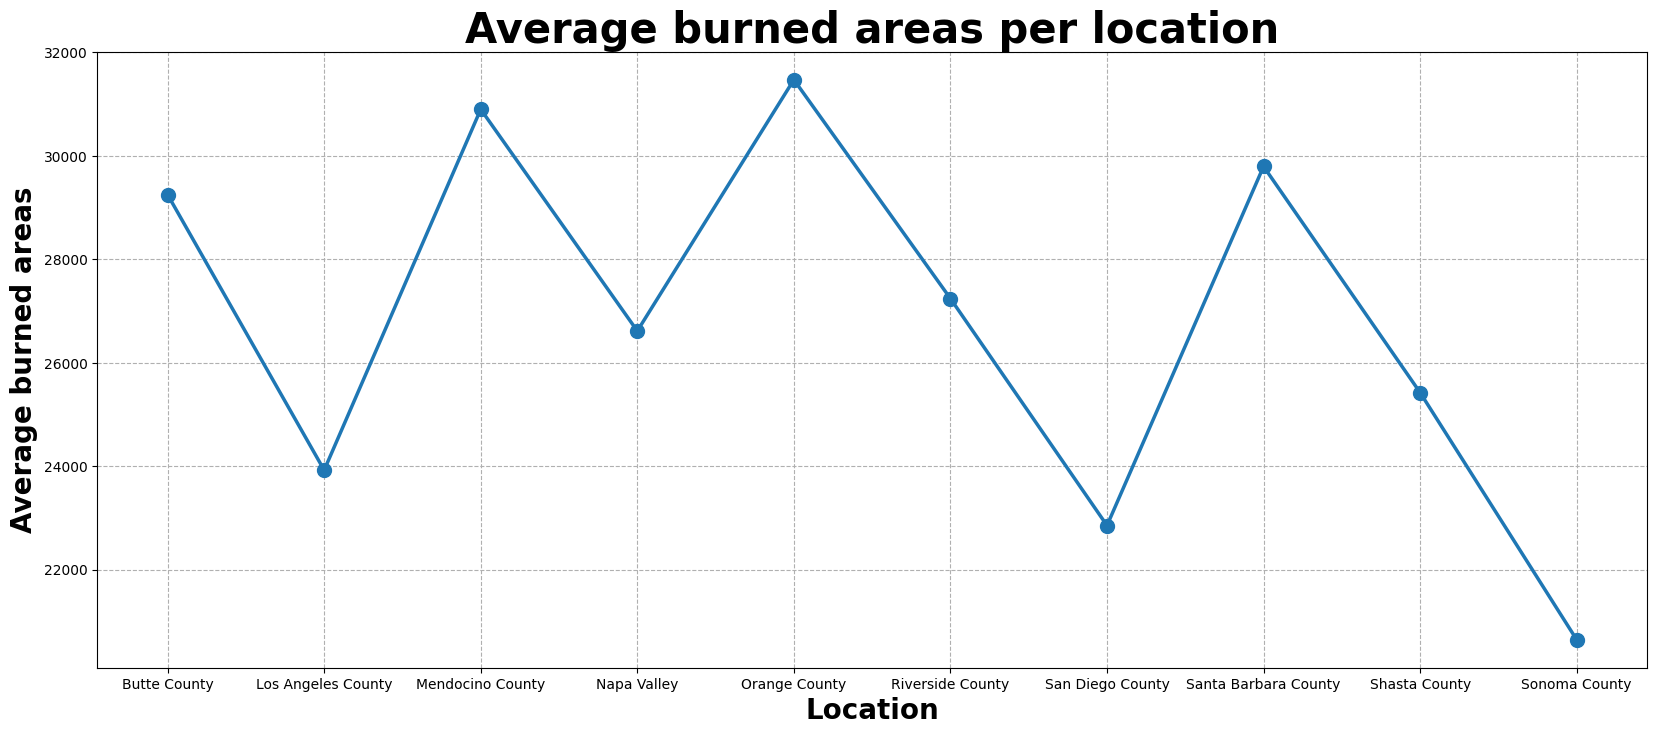

In [348]:
avg_burned_areas_per_date = data.groupby('Location')['Area_Burned (Acres)'].mean()

plt.figure(figsize=(20, 8))
plt.plot(avg_burned_areas_per_date.index, avg_burned_areas_per_date.values, lw=2.5, marker='o', ms=10)
plt.title('Average burned areas per location', size=30, fontweight='bold')
plt.xlabel('Location', size=20, fontweight='bold')
plt.ylabel('Average burned areas', size=20, fontweight='bold')
plt.grid(True, linestyle='--')
plt.show()

## **2️⃣ Bar plot**

- **Use**:
    1. Displays data using rectangular bars
    2. The height or length of the bars represents the
       magnitude of the data (Compare categorical data) 
- **✅Pros**: Easy comparison between groups.
- **❌Cons**: Doesn’t show variability within groups.

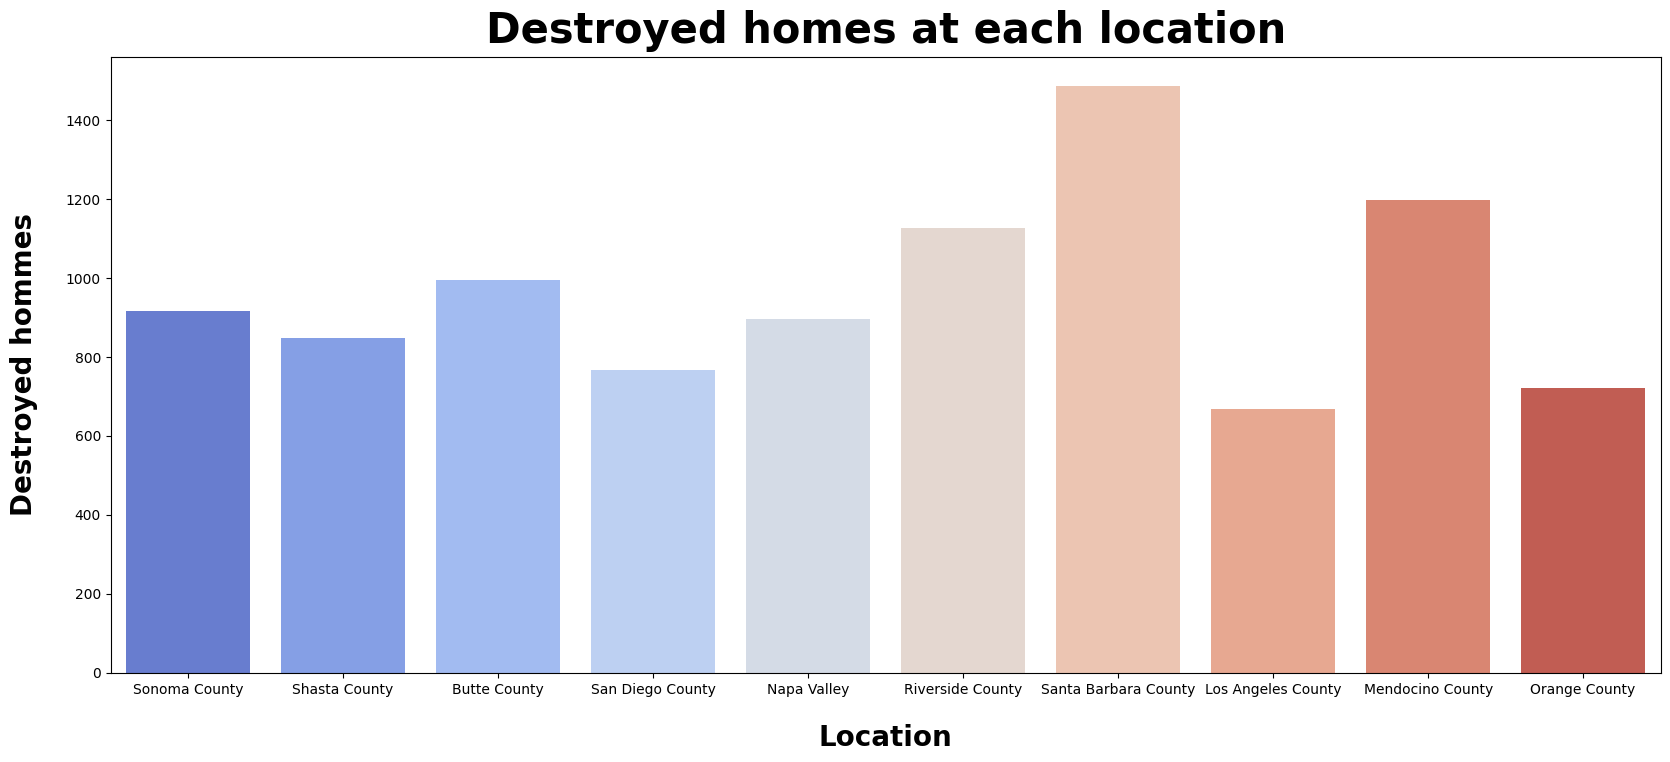

In [349]:
plt.figure(figsize=(20, 8))

sns.barplot(x='Location', y='Homes_Destroyed', palette='coolwarm', ci=None,data=data)
plt.title('Destroyed homes at each location', size=30, pad=10,fontweight='bold')
plt.xlabel('Location', size=20, labelpad=20, fontweight='bold')
plt.ylabel('Destroyed hommes', size=20, labelpad=20,fontweight='bold')
plt.show()

## **3️⃣ Scatter plot**

- **Use**:
    1. Displays the relationship between two continuous variables using dots (points).
    2. Detect outliers or unusual observations.
    3.  Identify clusters or groups in the data.
- **✅Pros**:
    1. Identifing correlations
    2. Detection patterns, trends, or clusters in data.
    3. Spotting outliers in a dataset
- **❌Cons**:
    1. Overlapping points make it hard to see individual data points.
    2. Not ideal for categorical data.
    3. Does not work well with large datasets unless transparency in used.

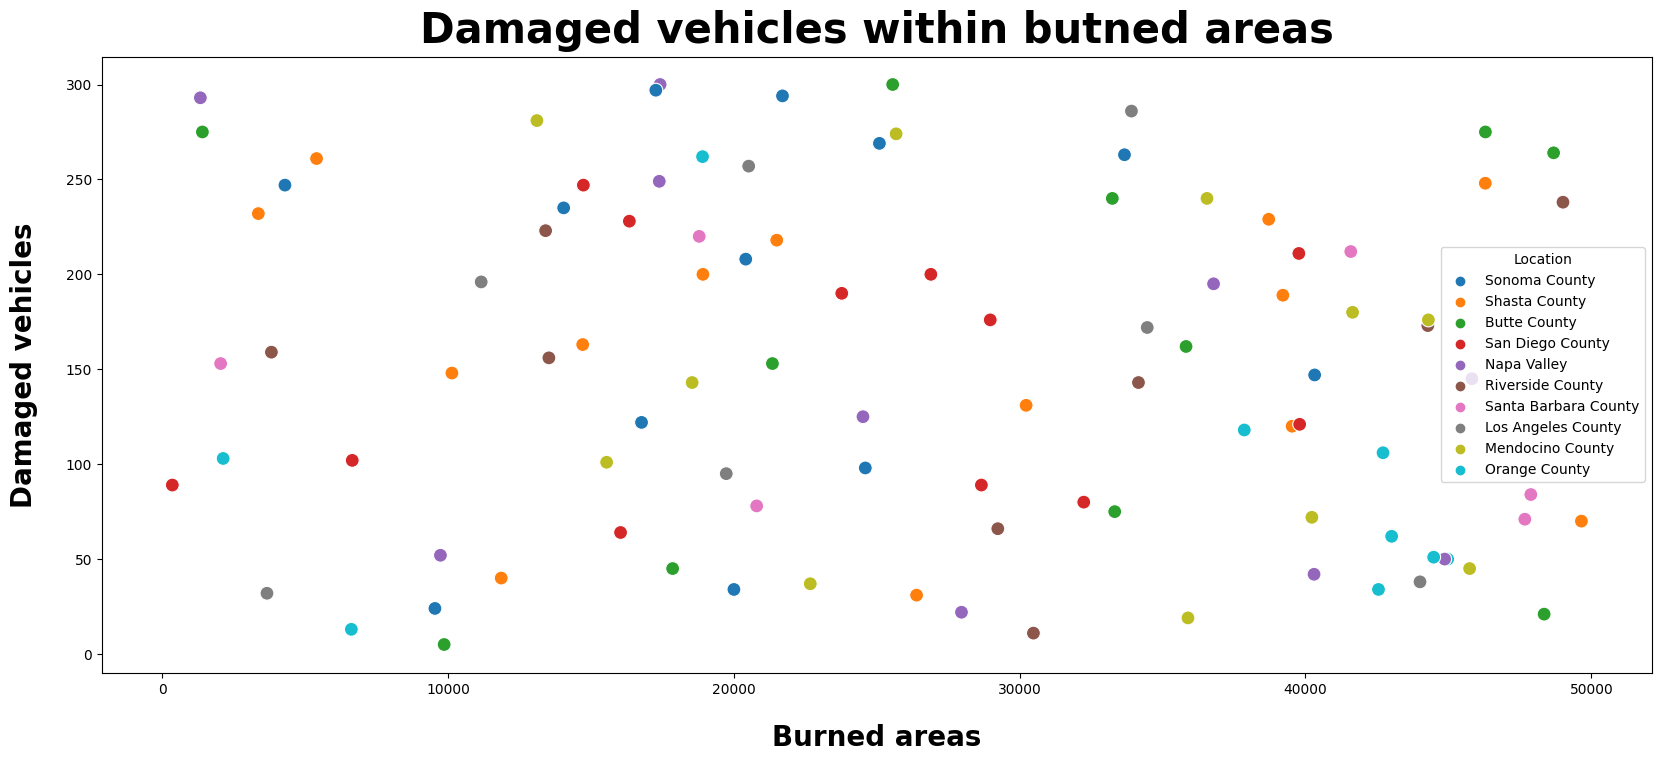

In [350]:
plt.figure(figsize=(20, 8))

sns.scatterplot(data, x='Area_Burned (Acres)', y='Vehicles_Damaged', hue='Location', s=100)
plt.title('Damaged vehicles within butned areas', size=30, pad=10,fontweight='bold')
plt.xlabel('Burned areas', size=20, labelpad=20, fontweight='bold')
plt.ylabel('Damaged vehicles', size=20, labelpad=20,fontweight='bold')
plt.show()

## **4️⃣ Box plot**

- **Use**:
    1. Displays the distribution of a dataset along with key statistical measures
    2. Represent the interquartile rang sa a box, a median line, and whiskers indicating range.
    3. Represent outliers as individual data points beyond whiskers
- **✅Pros**: Helps detect outliers and visualize quartiles.
- **❌Cons**: Doesn’t show individual data points clearly for small datasets.

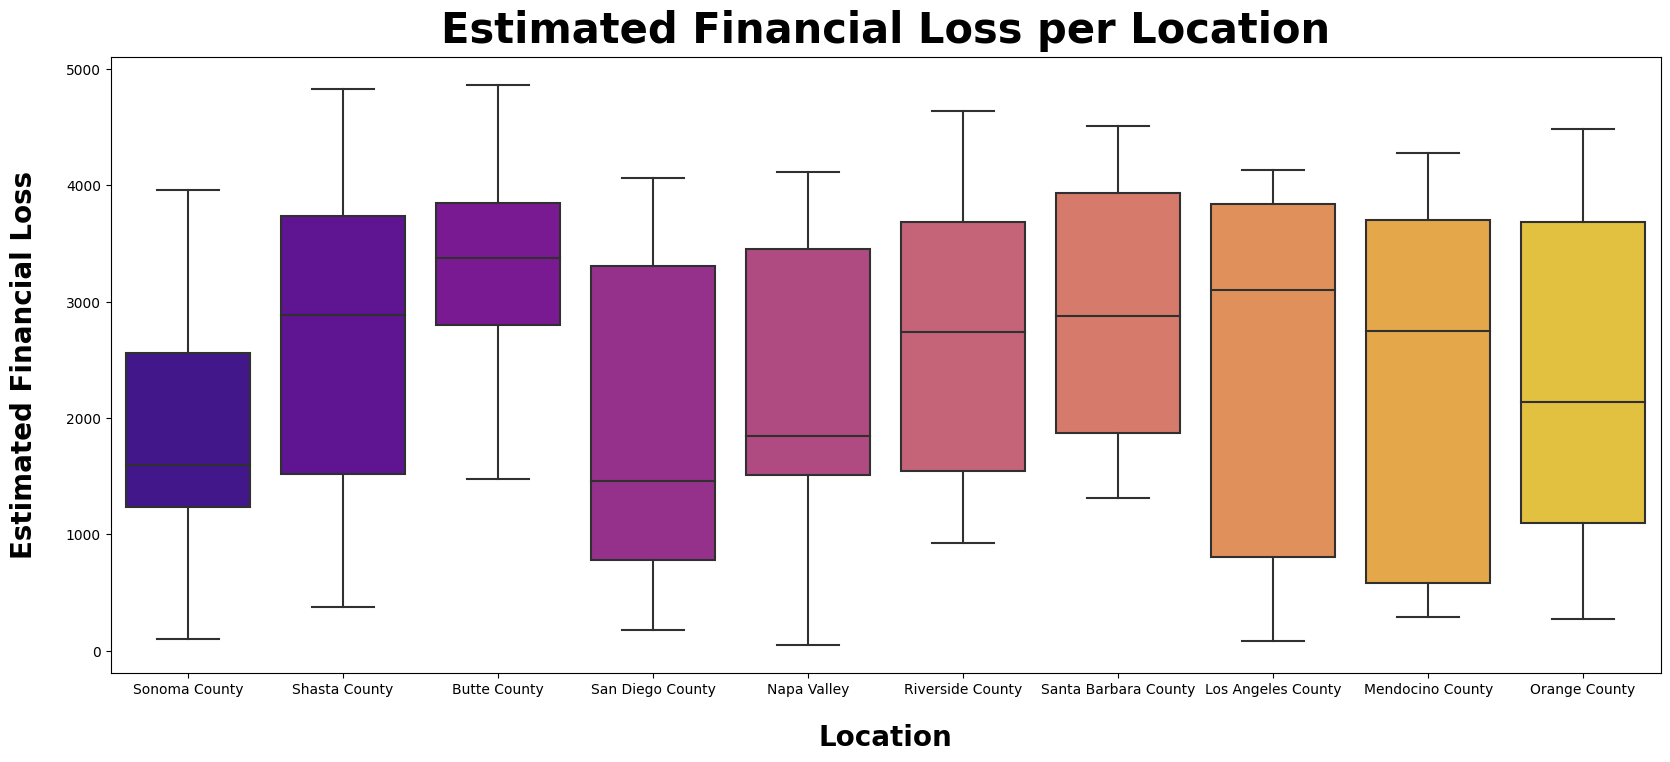

In [351]:
plt.figure(figsize=(20, 8))

sns.boxplot(data, x='Location', y='Estimated_Financial_Loss (Million $)', palette='plasma')
plt.title('Estimated Financial Loss per Location', size=30, pad=10,fontweight='bold')
plt.xlabel('Location', size=20, labelpad=20, fontweight='bold')
plt.ylabel('Estimated Financial Loss', size=20, labelpad=20,fontweight='bold')
plt.show()

## **5️⃣ Histogram**

- **Use**:
    1. Represents the frequency distribution of a dataset by dividing the values into bins (intervals).
    2. Helps in analyzing the shape, skewness, and modality of the data.
- **✅Pros**:
    1. Simple to understand
    2. Useful for detecting skewness and modality
    3. Shows distribution patterns clearly
- **❌Cons**:
    1. Bin size selection affects interpretation
    2. Not effective for small datasets
    3. Less informative for categorical data

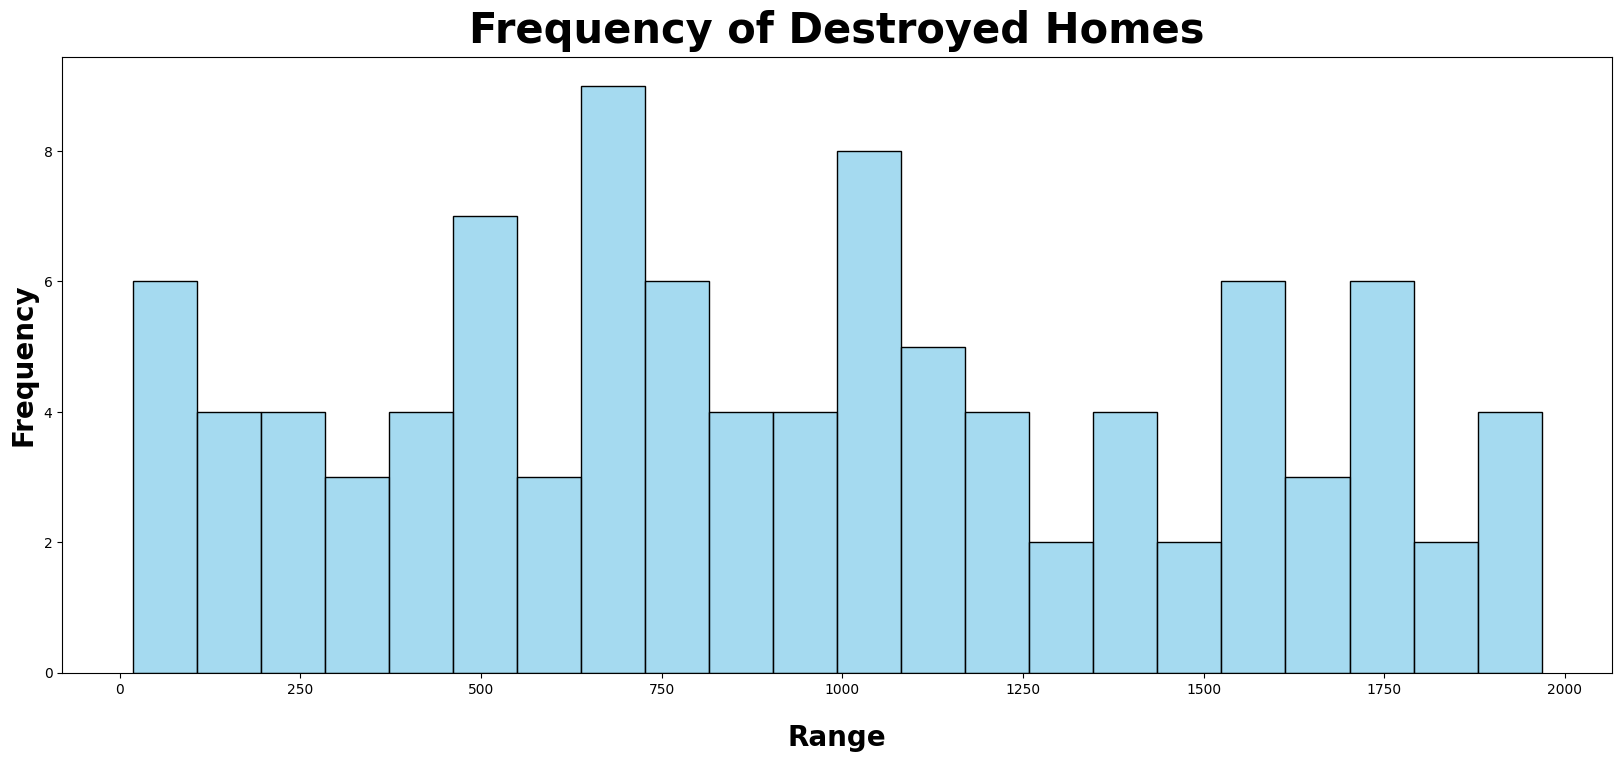

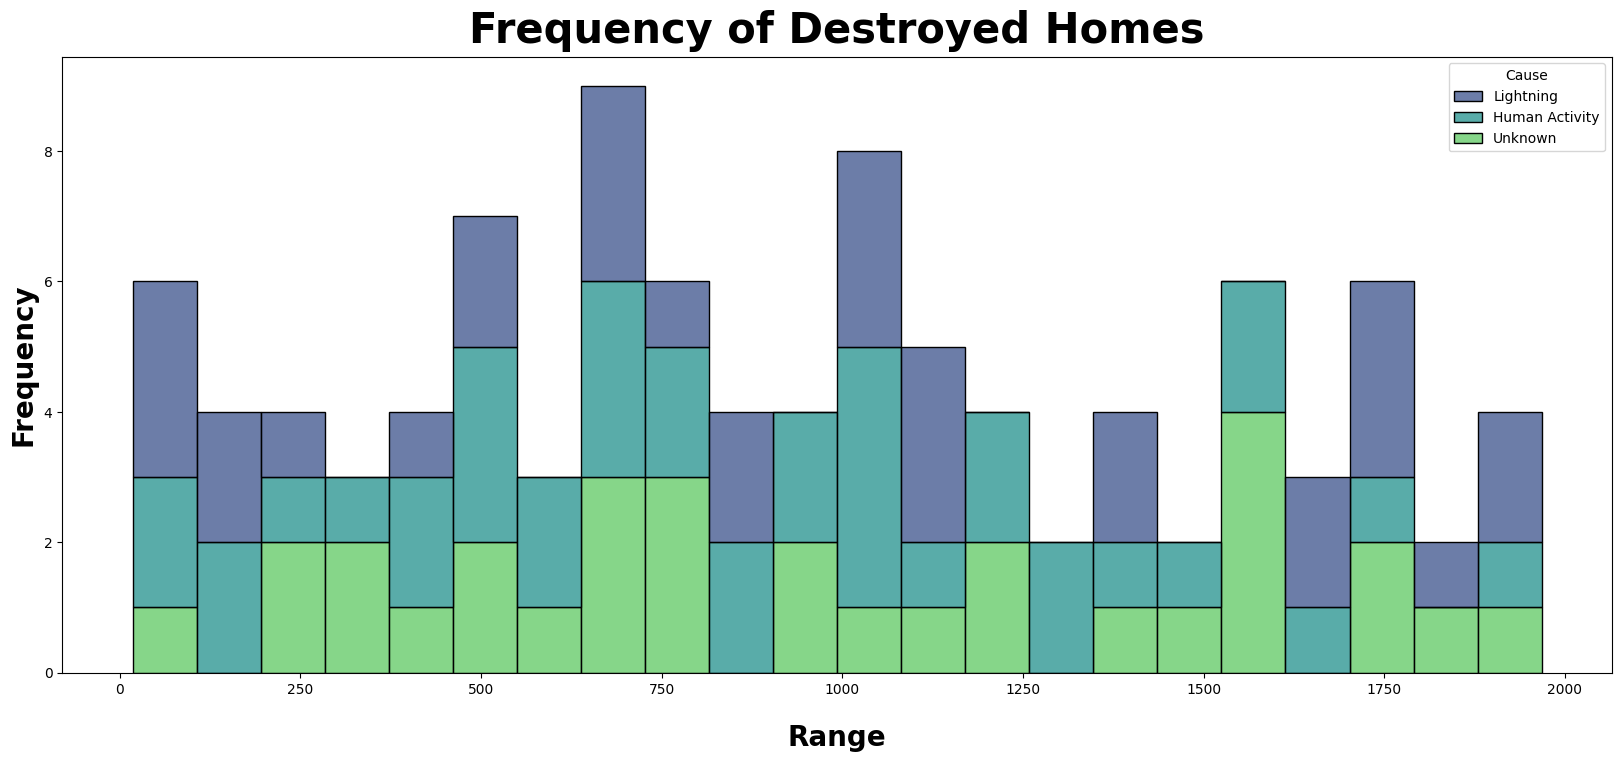

In [352]:
plt.figure(figsize=(20, 8))

sns.histplot(data=data, x="Homes_Destroyed", bins=22, color='skyblue')
plt.title("Frequency of Destroyed Homes", size=30, pad=10, fontweight="bold")
plt.xlabel("Range", size=20, labelpad=20, fontweight="bold")
plt.ylabel("Frequency", size=20, fontweight="bold")
plt.show()

plt.figure(figsize=(20, 8))
sns.histplot(data=data, x="Homes_Destroyed", bins=22, hue="Cause", 
             multiple="stack", palette="viridis", edgecolor="black")
plt.title("Frequency of Destroyed Homes", size=30, pad=10, fontweight="bold")
plt.xlabel("Range", size=20, labelpad=20, fontweight="bold")
plt.ylabel("Frequency", size=20, fontweight="bold")

plt.show()


## **6️⃣ KDE Plot (Kernel Density Estimate)**

- **Use**:  Displays the smoothed probability density of a dataset.
- **✅Pros**:
    1. More accurate visualization of distribution shape than histograms.
    2. Helps identify multiple peaks in a dataset (multimodal distribution).
- **❌Cons**:
    1. Small datasets may result in misleading curves.
    2. The bandwidth parameter affects smoothness.

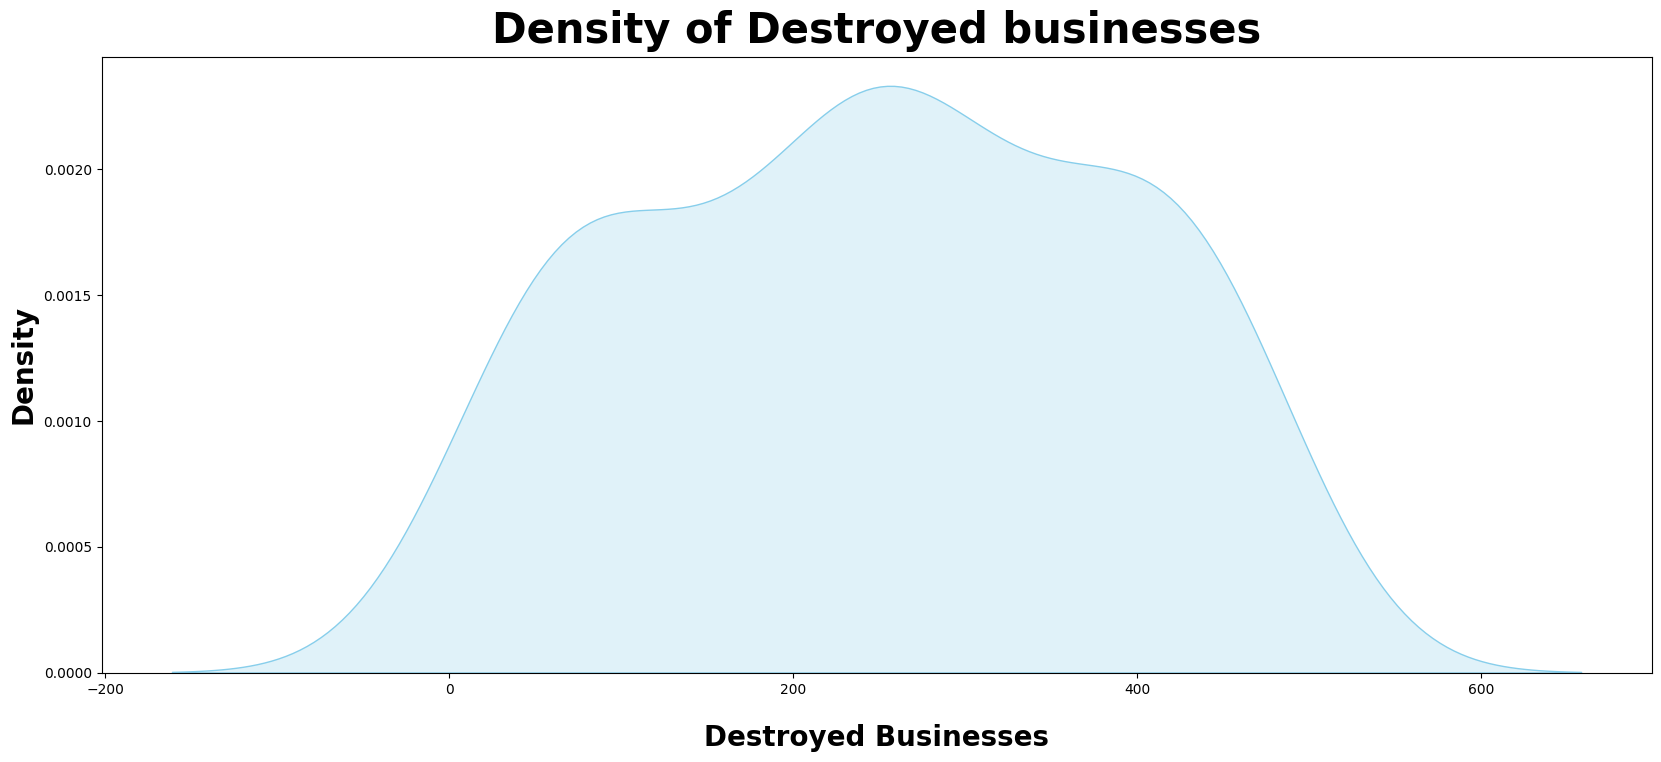

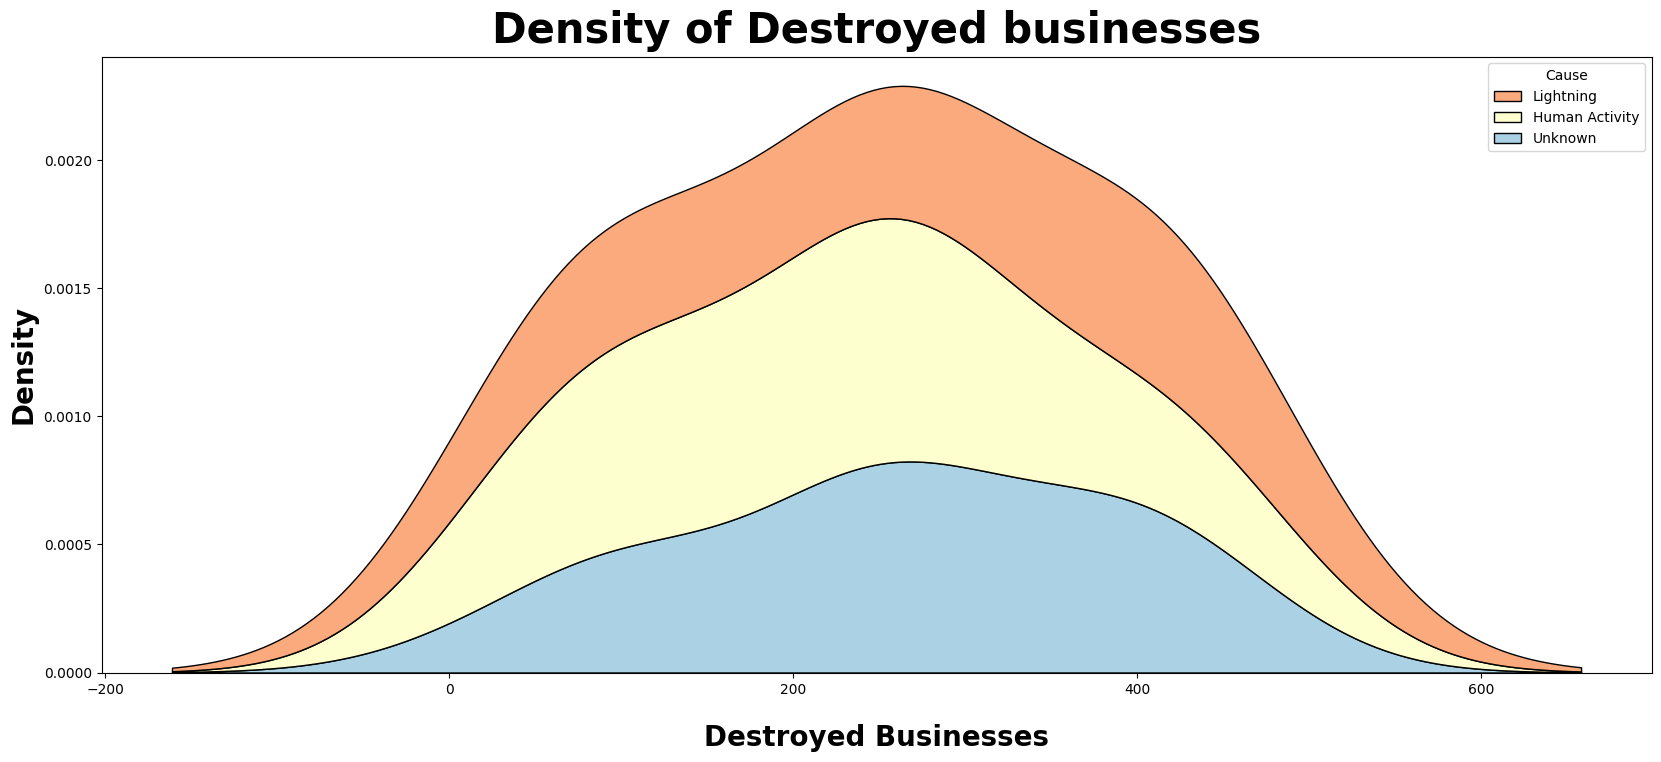

In [353]:
plt.figure(figsize=(20, 8))

sns.kdeplot(data["Businesses_Destroyed"], fill=True, color="skyblue")
plt.title("Density of Destroyed businesses", size=30, pad=10, fontweight="bold")
plt.xlabel("Destroyed Businesses", size=20, labelpad=20, fontweight="bold")
plt.ylabel("Density", size=20, fontweight="bold")
plt.show()

plt.figure(figsize=(20, 8))
sns.kdeplot(data=data, x="Businesses_Destroyed", hue="Cause", 
             multiple="stack", palette="RdYlBu", edgecolor="black")
plt.title("Density of Destroyed businesses", size=30, pad=10, fontweight="bold")
plt.xlabel("Destroyed Businesses", size=20, labelpad=20, fontweight="bold")
plt.ylabel("Density", size=20, fontweight="bold")

plt.show()


### 💡Histogram and KE

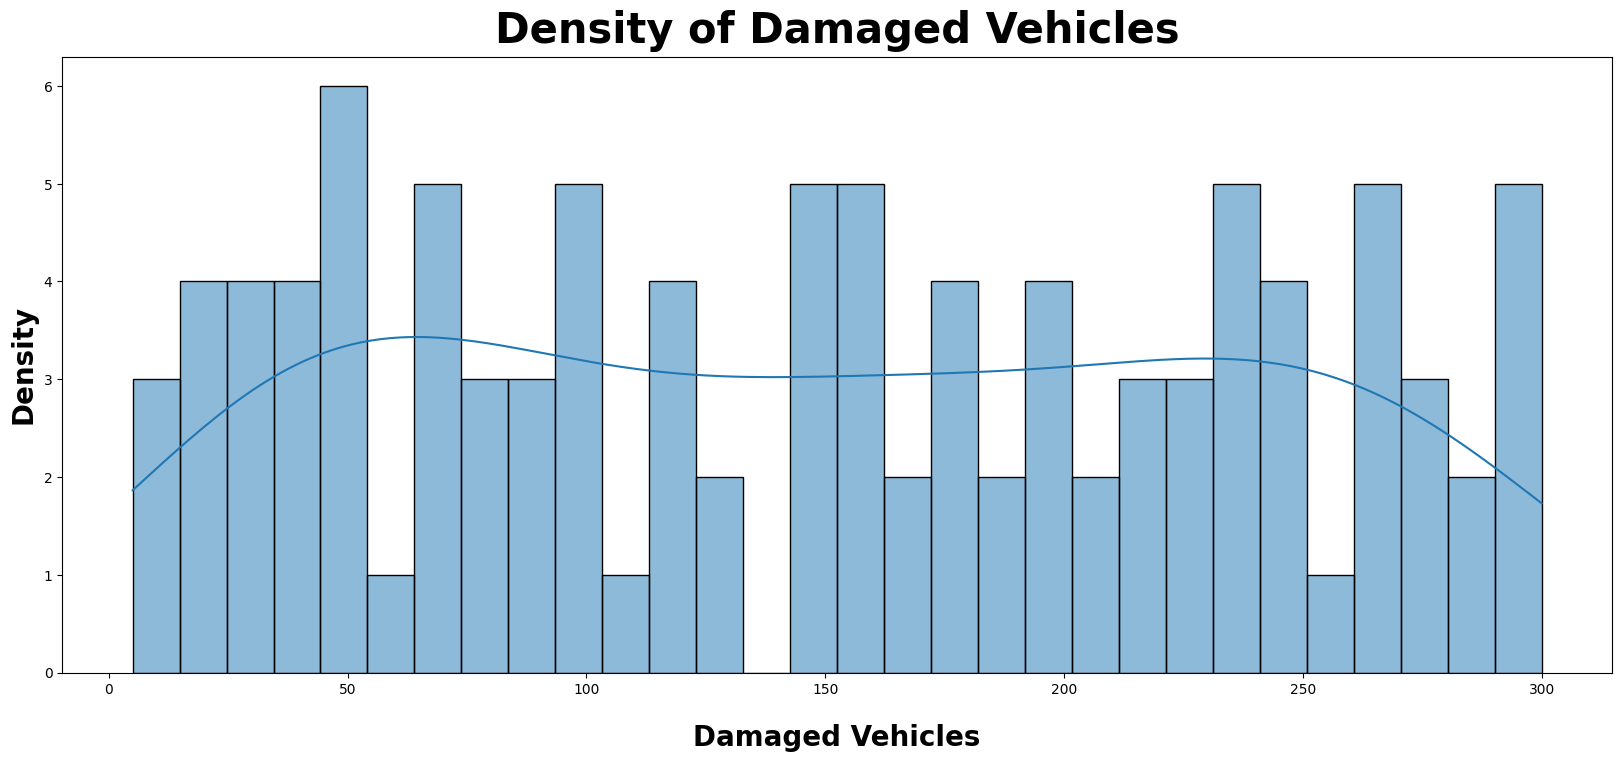

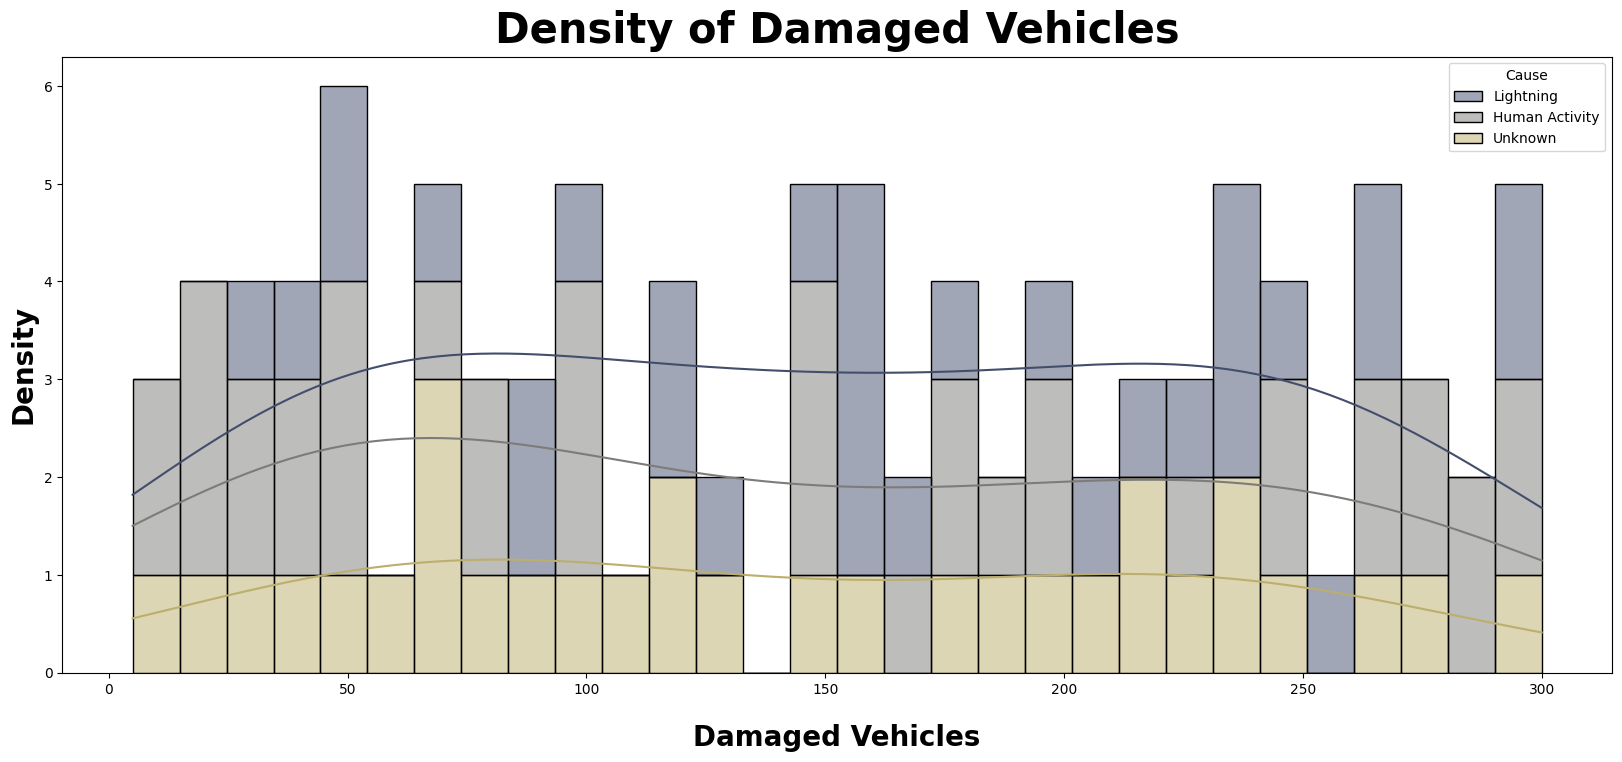

In [354]:
plt.figure(figsize=(20, 8))

sns.histplot(data=data, x='Vehicles_Damaged', kde=True, bins=30)
plt.title("Density of Damaged Vehicles", size=30, pad=10, fontweight="bold")
plt.xlabel("Damaged Vehicles", size=20, labelpad=20, fontweight="bold")
plt.ylabel("Density", size=20, fontweight="bold")
plt.show()

plt.figure(figsize=(20, 8))
sns.histplot(data=data, x="Vehicles_Damaged", kde=True, bins=30, hue="Cause", 
             multiple="stack", palette="cividis", edgecolor="black")
plt.title("Density of Damaged Vehicles", size=30, pad=10, fontweight="bold")
plt.xlabel("Damaged Vehicles", size=20, labelpad=20, fontweight="bold")
plt.ylabel("Density", size=20, fontweight="bold")

plt.show()

## **7️⃣ Pie Chart**

- **Use**: Displays proportions of categories in a dataset.
- **✅Pros**:
    1. Great for percentage-based comparisons.
    2. Intuitive and easy to understand
- **❌Cons**:
    1. Difficult to compare similar-sized slices.
    2. Not suitable for datasets with many categories.

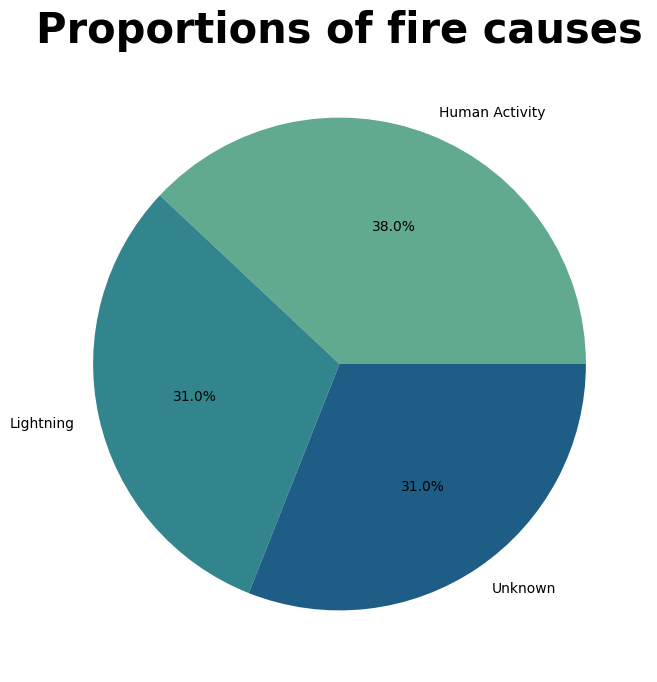

In [355]:
plt.figure(figsize=(10, 8))
cause_counts = data['Cause'].value_counts()
color = sns.color_palette("crest", len(cause_counts.index))

plt.pie(cause_counts, labels=cause_counts.index, autopct='%1.1f%%', colors=color)
plt.title("Proportions of fire causes", size=30, pad=10, fontweight="bold")
plt.show()

## **8️⃣ Heatmap**

- **Use**:
    1. Displays relationships between numerical variables in a dataset.
    2. Shows correlations, frequencies, or intensity of values in a matrix format.
- **✅Pros**:
    1. Works well for large datasets.
    2. Provides quick insights into patterns
- **❌Cons**: Can be hard to interpret without proper labeling or scaling

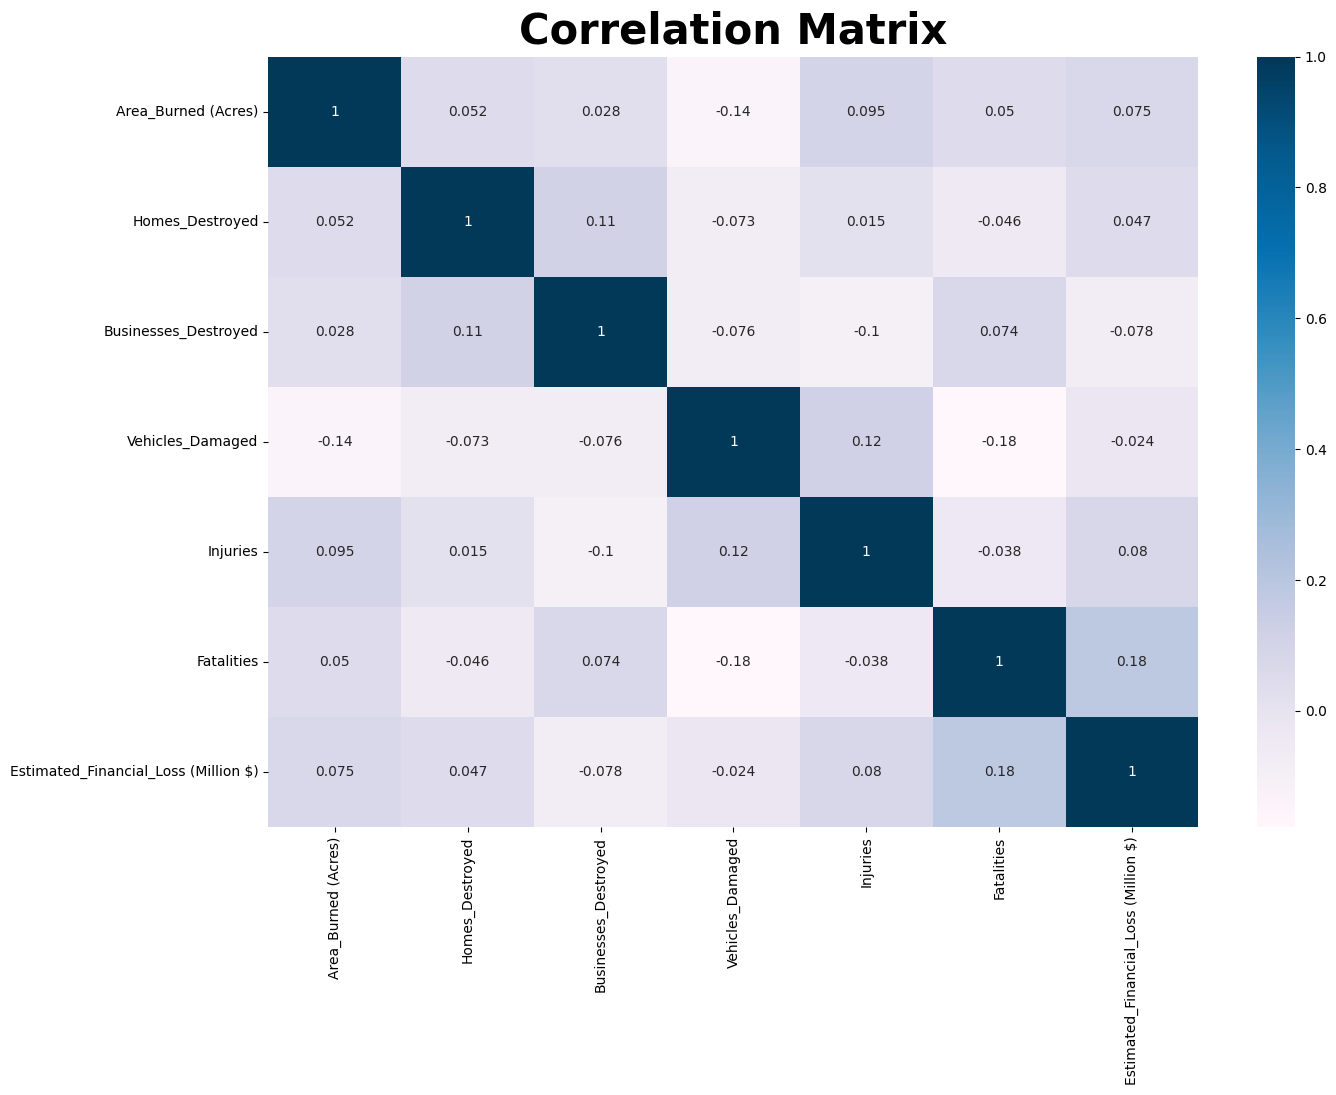

In [356]:
plt.figure(figsize=(15, 10))
data_matrix = data.select_dtypes(include=[np.number]).corr()

sns.heatmap(data_matrix, cmap="PuBu", annot=True)
plt.title("Correlation Matrix", size=30, pad=10, fontweight="bold")
plt.show()


## **9️⃣ Pair Plot**

- **Use**: Best for exploratory data analysis (EDA) when working with multiple numerical variables.
- **✅Pros**:
    1. Helps identify relationships and correlations between variables.
    2. Provides a quick overview of the dataset.
    3. Detects patterns, clusters, and outliers.
- **❌Cons**:
    1. Can be overwhelming for large datasets (many variables create too many plots).
    2. Categorical variables cannot be plotted directly.

### 📊 What Does a Pair Plot Show?
- Each scatter plot represents the relationship between two variables.
- The diagonal plots show the distribution of each variable (usually histograms or KDE plots).
- If two variables are correlated, their scatter plot will show a clear trend.

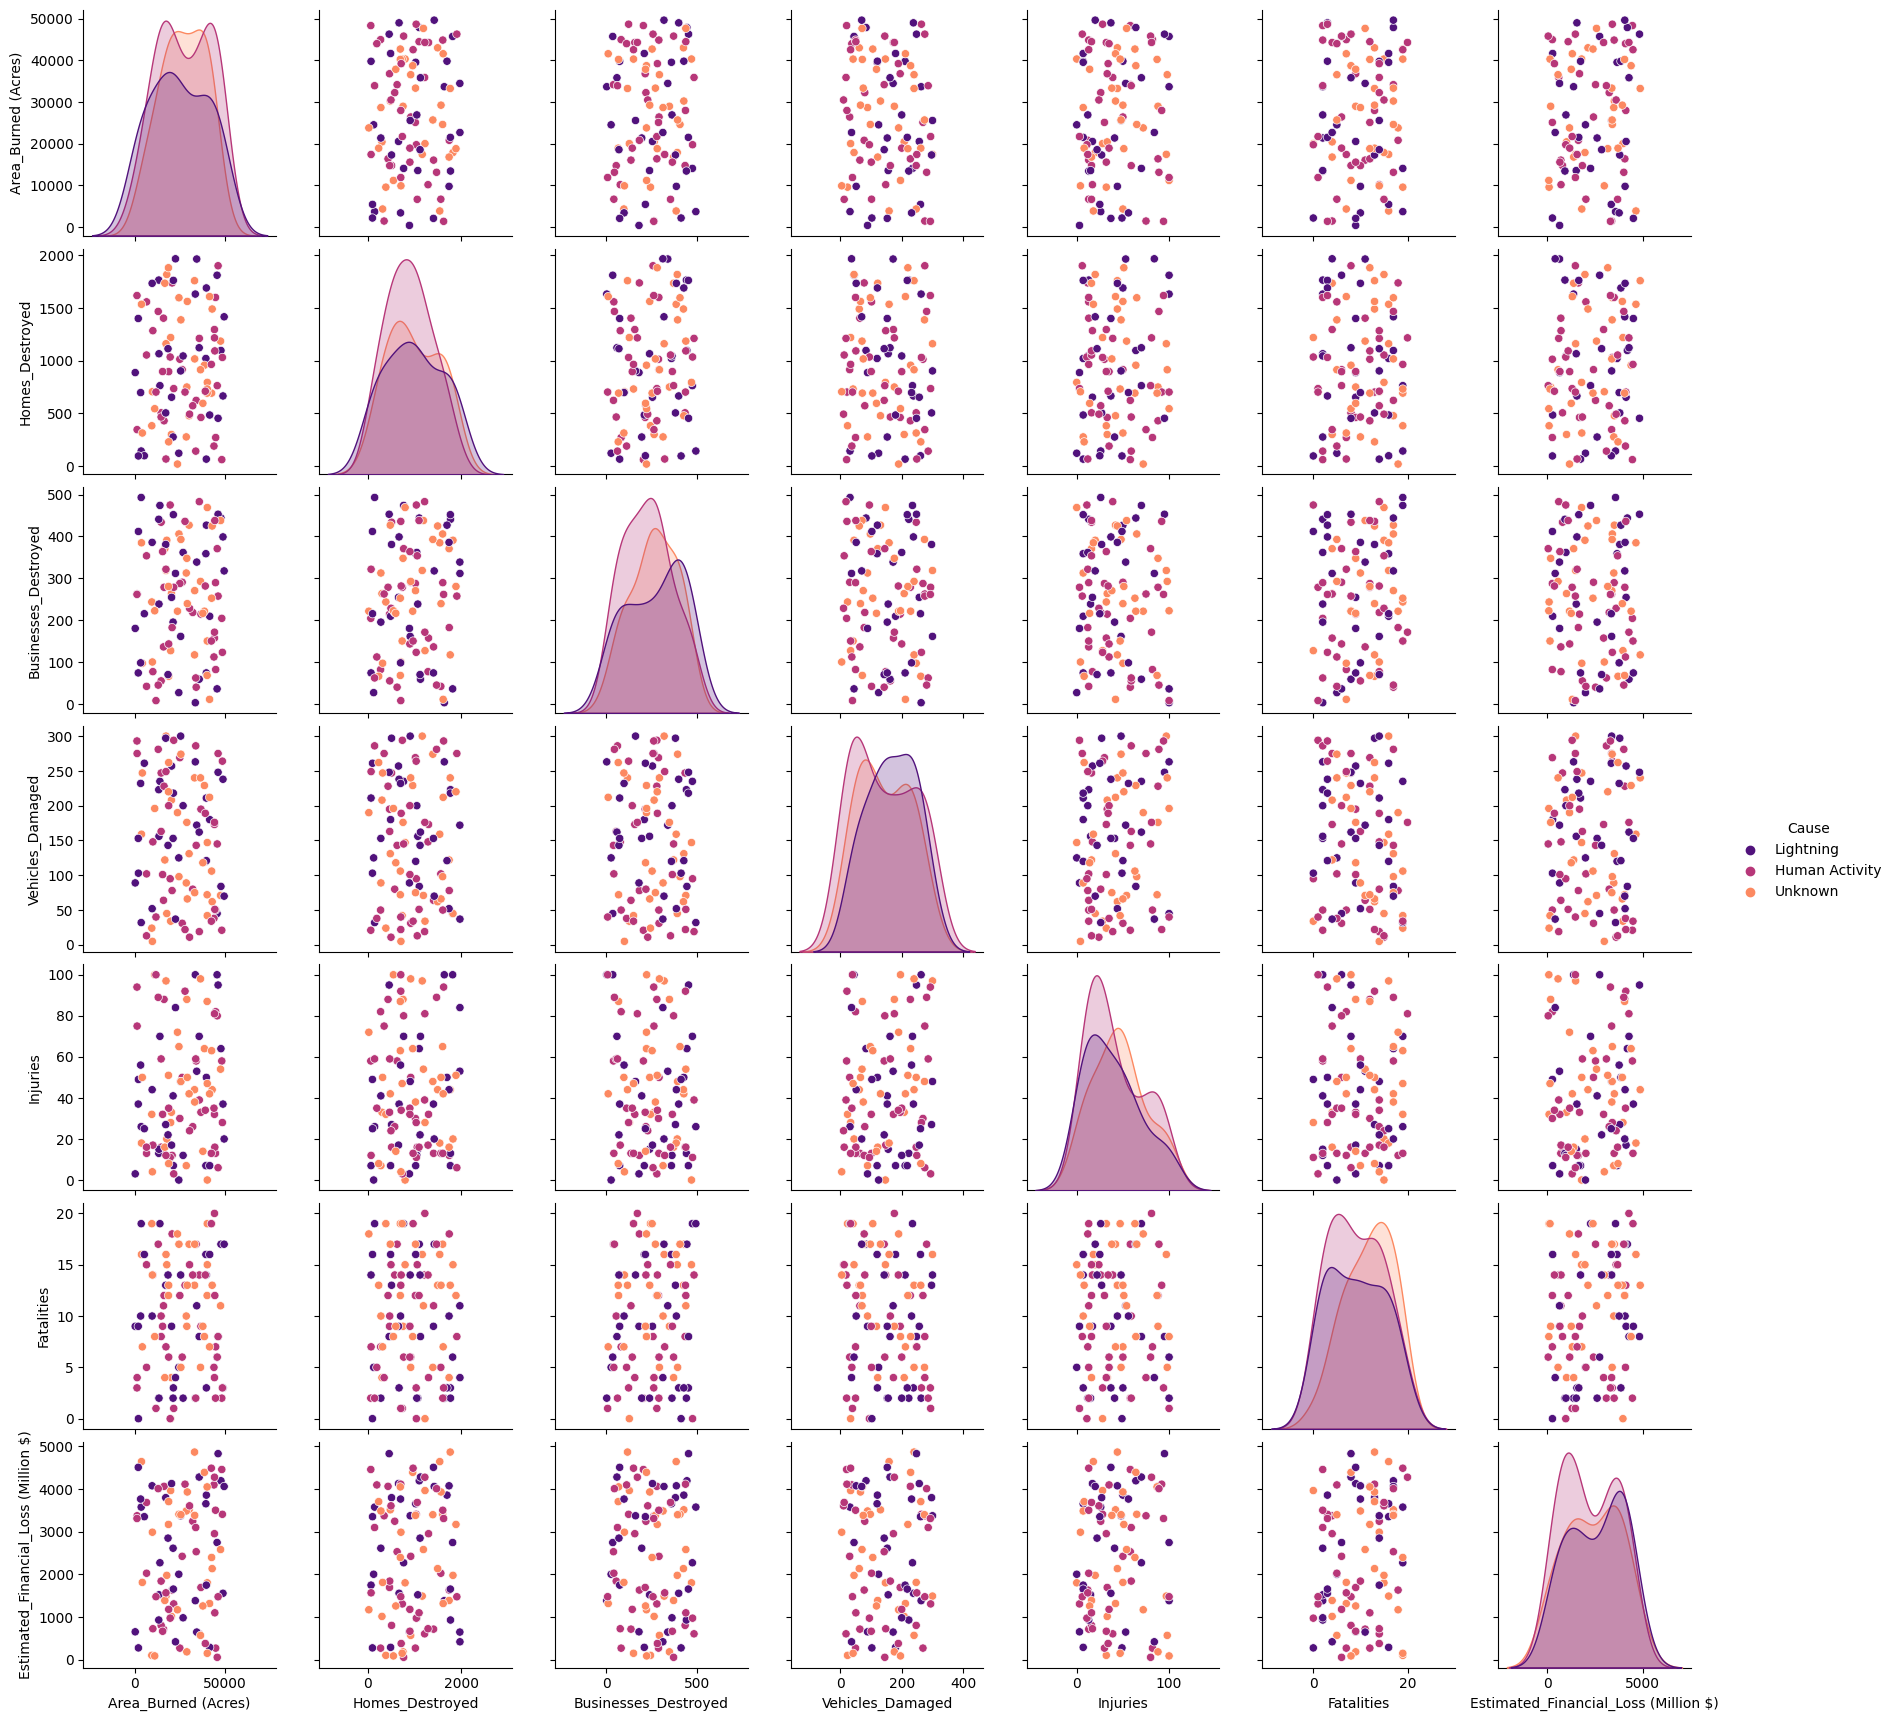

In [357]:
sns.pairplot(data, hue='Cause', palette='magma')

## **1️⃣0️⃣ Count Plot**

- **Use**: Displays the count of unique values in a categorical variable.
- **✅Pros**:
    1. Simple and effective for understanding categorical distributions.
    2. Automatically counts occurrences.
- **❌Cons**:
    1. Only works with categorical data.
    2. Can not trenda or numerical distributions.

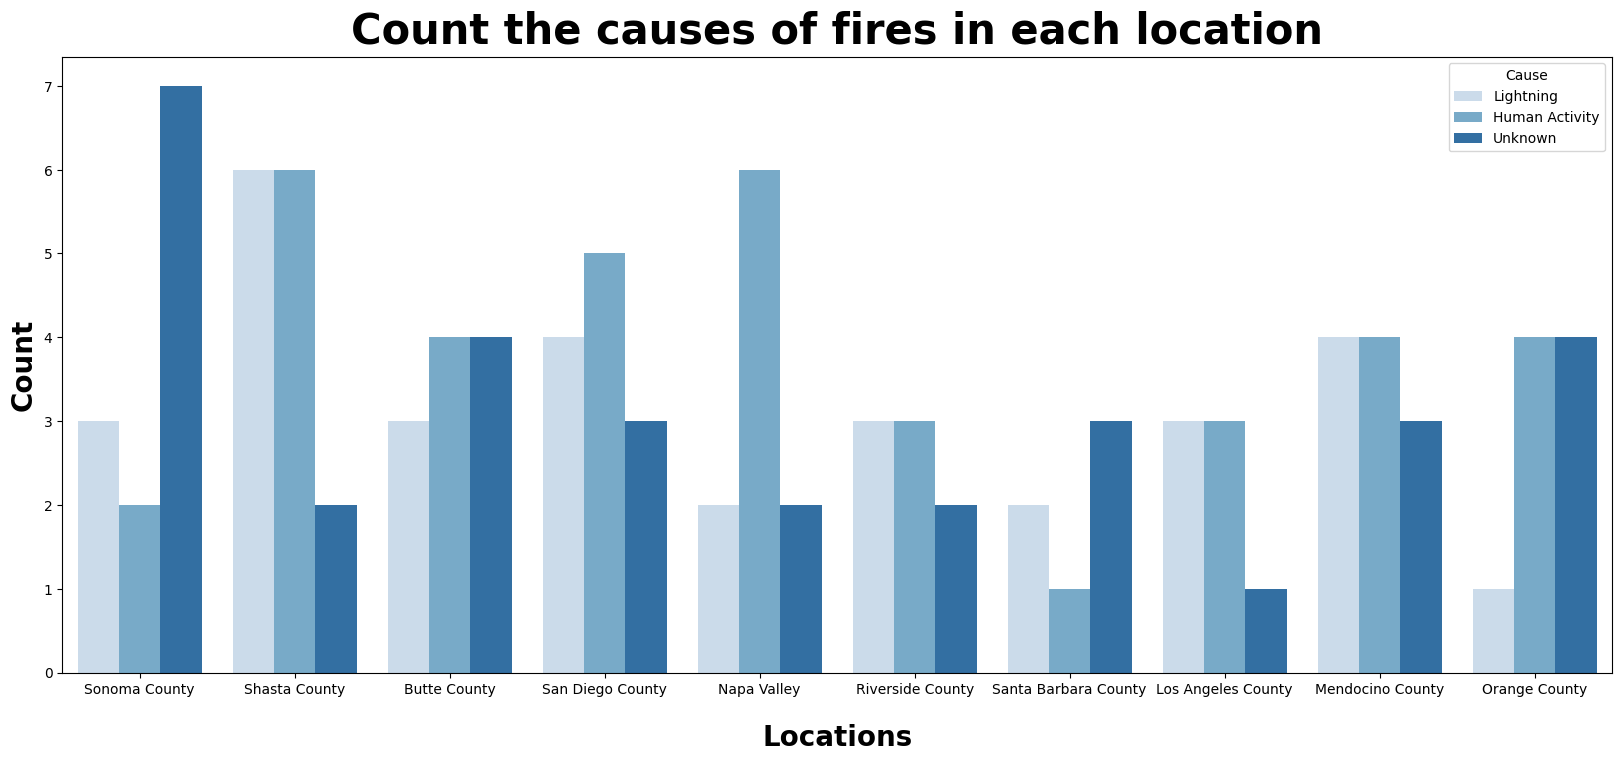

In [358]:
plt.figure(figsize=(20, 8))

sns.countplot(data=data, x='Location', hue='Cause', palette='Blues')
plt.title("Count the causes of fires in each location", size=30, pad=10, fontweight="bold")
plt.xlabel("Locations", size=20, labelpad=20, fontweight="bold")
plt.ylabel("Count", size=20, fontweight="bold")
plt.show()